<a href="https://colab.research.google.com/github/marutitaluru/marutitaluru/blob/main/Capstone_Project_CV2_Car_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 2.1 MB 24.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72858 sha256=ca94db34d35c87910141df6a4f7a0c9988409fdf8fc92d81026c4b90788d1430
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle


In [10]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
! cp kaggle.json ~/.kaggle/

In [12]:
!chmod 600 ~/.kaggle/kaggle.json

In [20]:
! kaggle datasets download jutrera/stanford-car-dataset-by-classes-folder

100% 1.83G/1.83G [00:19<00:00, 102MB/s] 
100% 1.83G/1.83G [00:19<00:00, 103MB/s]


In [21]:
!unzip stanford-car-dataset-by-classes-folder.zip

Streaming output truncated to the last 5000 lines.
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/04381.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/04688.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/04772.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/05544.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/05728.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/05860.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06146.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06157.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06332.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06441.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06447.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06590.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06650.jpg  


In [22]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import cv2
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.8.0'

In [23]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.activations import relu
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
from sklearn import svm
from keras.preprocessing import image
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pr
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
import glob 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers

In [25]:
train = "/content/car_data/car_data/train/*/*.jpg"

In [26]:
data = glob.glob(train)

count =0

for d in data:
      count = count +1
      # read image
      img = cv2.imread(d, cv2.IMREAD_UNCHANGED)
      # get dimensions of image
      dimensions = img.shape 
      # height, width, number of channels in image
      height = img.shape[0]
      width = img.shape[1]
      channels = img.shape[2]
      
      print('Image Dimension    : ',dimensions)
      print('Image Height       : ',height)
      print('Image Width        : ',width)
      print('Number of Channels : ',channels)
      if count == 10:
        break

Image Dimension    :  (194, 259, 3)
Image Height       :  194
Image Width        :  259
Number of Channels :  3
Image Dimension    :  (480, 640, 3)
Image Height       :  480
Image Width        :  640
Number of Channels :  3
Image Dimension    :  (480, 640, 3)
Image Height       :  480
Image Width        :  640
Number of Channels :  3
Image Dimension    :  (192, 263, 3)
Image Height       :  192
Image Width        :  263
Number of Channels :  3
Image Dimension    :  (114, 228, 3)
Image Height       :  114
Image Width        :  228
Number of Channels :  3
Image Dimension    :  (480, 640, 3)
Image Height       :  480
Image Width        :  640
Number of Channels :  3
Image Dimension    :  (183, 275, 3)
Image Height       :  183
Image Width        :  275
Number of Channels :  3
Image Dimension    :  (194, 259, 3)
Image Height       :  194
Image Width        :  259
Number of Channels :  3
Image Dimension    :  (375, 500, 3)
Image Height       :  375
Image Width        :  500
Number of Channe

In [35]:
colnames=['Image_Name', 'x1', 'y1', 'x2','y2','Class'] 

df_train = pd.read_csv('anno_train.csv', names=colnames, header=None )

In [36]:
df_train.head()

,Image_Name,x1,y1,x2,y2,Class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [43]:
import matplotlib.patches as patches

11 253 45 189
13 626 136 380
19 618 83 384
10 251 52 132
35 194 42 105
12 614 62 447
12 265 32 169
7 250 69 176
64 395 109 274
107 1146 279 618
17 282 25 153
19 246 54 170
39 1003 201 681
54 1220 515 884
22 179 58 136
4 270 25 165
38 597 59 452
7 290 61 205


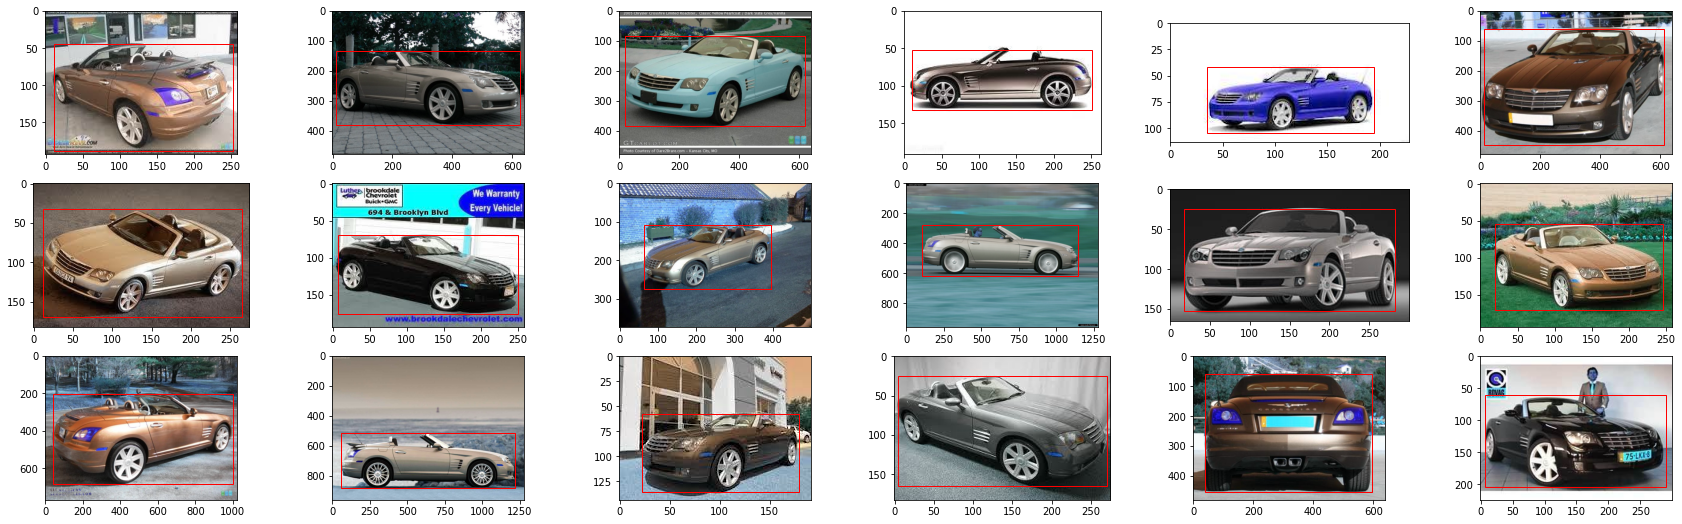

In [47]:
num = 18
num_row = 3
num_col = 6    
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(5*num_col,3*num_row))
data = glob.glob(train)

count =-1

for d in data:
      count = count +1
      # read image
   
      img = cv2.imread(d, cv2.IMREAD_UNCHANGED)
      ax = axes[count//num_col, count%num_col]
      ax.imshow(img, cmap='gray')

      for i, row in df_train.iterrows():
        if d.split("/", 6)[-1] == row["Image_Name"]:                 
          x1 = int(row["x1"])
          x2 = int(row["x2"])
          Length = int(abs(x2-x1))
          y1 = int(row["y1"])
          y2 = int(row["y2"])
          Height = int(abs(y2-y1))
          print(x1, x2, y1, y2)

          # Create a Rectangle patch
          #print(x1,y1,x2,y2)
          rect = patches.Rectangle((x1, y1), Length, Height, linewidth=1, edgecolor='r', facecolor="none")
          # Add the patch to the Axes
          ax.add_patch(rect)


      if count == 17:
        break

plt.show()